# Notebook 3: CNN Model

The objective of this project is to create an image classification model by classifying x-rays whether someone has pneumonia or not. The tutorial I followed to run a convolutional neural network to identify whether one has pneumonia or not can be found from [tensorflow.com](https://www.tensorflow.org/tutorials/images/classification)



In [6]:
import glob
import sys
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
# For reproducible results:
from numpy.random import seed
seed(1)
%matplotlib inline

The dataset has the following directory structure:

<pre>
<b>data</b>
|__ <b>train</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
|__ <b>test</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
</pre>

In [2]:
train_directory = '../data/train/'
test_directory = '../data/test/'

normal_tr = glob.glob('../data/train/NORMAL/*.jpeg')
pneumonia_tr = glob.glob('../data/train/PNEUMONIA/*.jpeg')

normal_test = glob.glob('../data/test/NORMAL/*.jpeg')
pneumonia_test = glob.glob('../data/test/PNEUMONIA/*.jpeg')


print(f"Total training normal images: {len(normal_tr)}")
print(f"Total training pneumonia images: {len(pneumonia_tr)}")
print(f"Total test normal images: {len(normal_test)}")
print(f"Total train normal images: {len(pneumonia_test)}")
print("--")
print("Total training images:", len(glob.glob('../data/train/*/*.jpeg')))
print("Total test images:", len(glob.glob('../data/test/*/*.jpeg')))

Total training normal images: 1341
Total training pneumonia images: 3875
Total test normal images: 242
Total train normal images: 398
--
Total training images: 5216
Total test images: 640


Loading `train_data` and `test_data` which are the images transformed into floating point tensors.

In [3]:
%run '../assets/tensor_data.py'

Found 5216 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [4]:
# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
# list of objects
variables = [x for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars]

if 'train_data' in variables and 'test_data' in variables:
    print('train_data and test_data have successfully been imported.')
else:
    print('train_data and test_data have not been imported.')

train_data and test_data have successfully been imported.


## Convolutional Neural Network

Keras' Convolutional Neural Network model was implemented to classify whether a patient has pneumonia. There are 9 layers that consist of multiple **convolutional 2D layers**, **max pooling layers**, and a single **flatten layer**. A CNN is used to capture the spatial distributions in an image by applying the aforementioned filters. 

The first Conv2D is the input layer which takes in the images that have been converted to 224x224x3 floating point tensors.

In [8]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(224, 224 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1025, activation = 'relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 250

In [10]:
total_train_images = len(glob.glob('../data/train/*/*.jpeg'))
total_test_images = len(glob.glob('../data/test/*/*.jpeg'))


In [11]:
history = model.fit_generator(
    train_data,
    steps_per_epoch = total_train_images // batch_size,
    epochs = epochs,
    validation_data = train_data,
    validation_steps = total_test_images // batch_size,
    verbose = 1
)

Epoch 1/250
40/40 [==============================] - 119s 3s/step - loss: 0.4914 - accuracy: 0.7703 - val_loss: 1.5185 - val_accuracy: 0.7375
Epoch 2/250
40/40 [==============================] - 84s 2s/step - loss: 0.2961 - accuracy: 0.8719 - val_loss: 1.8474 - val_accuracy: 0.7375
Epoch 3/250
40/40 [==============================] - 83s 2s/step - loss: 0.2698 - accuracy: 0.8922 - val_loss: 1.4975 - val_accuracy: 0.7375
Epoch 4/250
40/40 [==============================] - 81s 2s/step - loss: 0.2000 - accuracy: 0.9148 - val_loss: 0.8577 - val_accuracy: 0.7375
Epoch 5/250
40/40 [==============================] - 85s 2s/step - loss: 0.2089 - accuracy: 0.9117 - val_loss: 1.9986 - val_accuracy: 0.7437
Epoch 6/250
40/40 [==============================] - 87s 2s/step - loss: 0.1959 - accuracy: 0.9266 - val_loss: 1.1399 - val_accuracy: 0.7437
Epoch 7/250
40/40 [==============================] - 145s 4s/step - loss: 0.2289 - accuracy: 0.9180 - val_loss: 1.8856 - val_accuracy: 0.7437
Epoch 8/250

40/40 [==============================] - 99s 2s/step - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.6546 - val_accuracy: 0.8062
Epoch 59/250
40/40 [==============================] - 88s 2s/step - loss: 0.1225 - accuracy: 0.9570 - val_loss: 0.1732 - val_accuracy: 0.9250
Epoch 60/250
40/40 [==============================] - 90s 2s/step - loss: 0.1173 - accuracy: 0.9555 - val_loss: 2.4076 - val_accuracy: 0.7750
Epoch 61/250
40/40 [==============================] - 99s 2s/step - loss: 0.1308 - accuracy: 0.9492 - val_loss: 0.2945 - val_accuracy: 0.8375
Epoch 62/250
40/40 [==============================] - 99s 2s/step - loss: 0.1276 - accuracy: 0.9578 - val_loss: 0.5475 - val_accuracy: 0.7500
Epoch 63/250
40/40 [==============================] - 92s 2s/step - loss: 0.1363 - accuracy: 0.9469 - val_loss: 0.9947 - val_accuracy: 0.5500
Epoch 64/250
40/40 [==============================] - 98s 2s/step - loss: 0.1207 - accuracy: 0.9555 - val_loss: 1.3786 - val_accuracy: 0.7750
Epoch 65/250
40/40 

40/40 [==============================] - 77s 2s/step - loss: 0.1011 - accuracy: 0.9664 - val_loss: 0.2166 - val_accuracy: 0.9312
Epoch 116/250
40/40 [==============================] - 76s 2s/step - loss: 0.1051 - accuracy: 0.9547 - val_loss: 0.8384 - val_accuracy: 0.7625
Epoch 117/250
40/40 [==============================] - 76s 2s/step - loss: 0.0889 - accuracy: 0.9695 - val_loss: 2.1156 - val_accuracy: 0.7063
Epoch 118/250
40/40 [==============================] - 75s 2s/step - loss: 0.1028 - accuracy: 0.9633 - val_loss: 0.1809 - val_accuracy: 0.9187
Epoch 119/250
40/40 [==============================] - 77s 2s/step - loss: 0.0846 - accuracy: 0.9672 - val_loss: 0.7493 - val_accuracy: 0.7812
Epoch 120/250
40/40 [==============================] - 75s 2s/step - loss: 0.1141 - accuracy: 0.9578 - val_loss: 0.7230 - val_accuracy: 0.7750
Epoch 121/250
40/40 [==============================] - 76s 2s/step - loss: 0.1070 - accuracy: 0.9586 - val_loss: 0.4436 - val_accuracy: 0.8438
Epoch 122/250

40/40 [==============================] - 88s 2s/step - loss: 0.0686 - accuracy: 0.9766 - val_loss: 0.6166 - val_accuracy: 0.8188
Epoch 173/250
40/40 [==============================] - 88s 2s/step - loss: 0.0770 - accuracy: 0.9688 - val_loss: 0.1989 - val_accuracy: 0.9125
Epoch 174/250
40/40 [==============================] - 98s 2s/step - loss: 0.1009 - accuracy: 0.9594 - val_loss: 0.1966 - val_accuracy: 0.9062
Epoch 175/250
40/40 [==============================] - 85s 2s/step - loss: 0.0960 - accuracy: 0.9672 - val_loss: 0.1976 - val_accuracy: 0.9062
Epoch 176/250
40/40 [==============================] - 85s 2s/step - loss: 0.0655 - accuracy: 0.9758 - val_loss: 1.4948 - val_accuracy: 0.8000
Epoch 177/250
40/40 [==============================] - 85s 2s/step - loss: 0.0957 - accuracy: 0.9672 - val_loss: 0.1777 - val_accuracy: 0.9500
Epoch 178/250
40/40 [==============================] - 88s 2s/step - loss: 0.0755 - accuracy: 0.9703 - val_loss: 0.1703 - val_accuracy: 0.9500
Epoch 179/250

40/40 [==============================] - 78s 2s/step - loss: 0.0784 - accuracy: 0.9672 - val_loss: 0.3010 - val_accuracy: 0.9125
Epoch 230/250
40/40 [==============================] - 1589s 40s/step - loss: 0.1023 - accuracy: 0.9703 - val_loss: 0.3863 - val_accuracy: 0.8000
Epoch 231/250
40/40 [==============================] - 98s 2s/step - loss: 0.0776 - accuracy: 0.9734 - val_loss: 0.3335 - val_accuracy: 0.8438
Epoch 232/250
40/40 [==============================] - 81s 2s/step - loss: 0.0633 - accuracy: 0.9750 - val_loss: 0.4562 - val_accuracy: 0.8562
Epoch 233/250
40/40 [==============================] - 76s 2s/step - loss: 0.0766 - accuracy: 0.9727 - val_loss: 0.4898 - val_accuracy: 0.7750
Epoch 234/250
40/40 [==============================] - 76s 2s/step - loss: 0.0787 - accuracy: 0.9695 - val_loss: 1.6614 - val_accuracy: 0.7500
Epoch 235/250
40/40 [==============================] - 87s 2s/step - loss: 0.0785 - accuracy: 0.9742 - val_loss: 0.3723 - val_accuracy: 0.8250
Epoch 236/

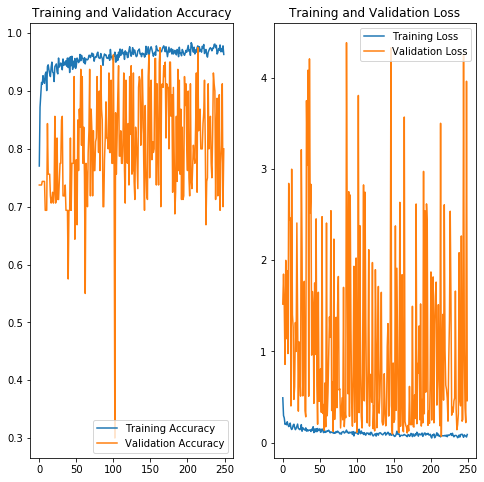

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()